In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 0. Pre-processing

In [60]:
df = pd.read_csv('./detailed_meals_macros_CLEANED.csv')
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease,Lunch Fats
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain,12.0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease",8.0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain,15.0
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,20.0,163.0,27.0,Banana with peanut butter,210,5,30,9,Weight Gain,10.0
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,6.3,186.0,22.0,Fruit and nut mix,250,6,28,15,Weight Gain,9.0


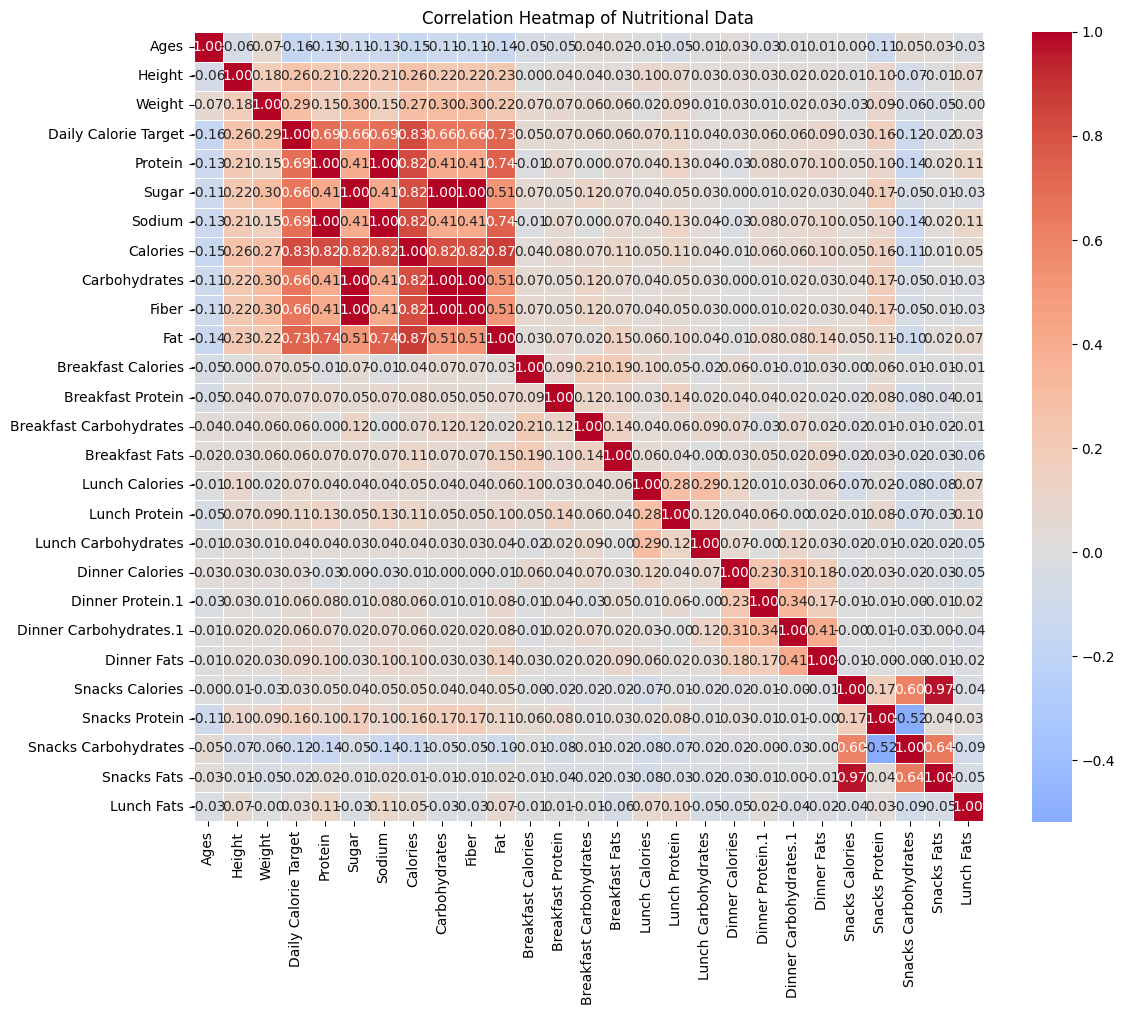

In [61]:
# kolom numerik untuk analisis korelasi
numeric_columns = df.select_dtypes(include=[np.number]).columns

# buat matriks korelasi
correlation_matrix = df[numeric_columns].corr()

# buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Data')
plt.tight_layout()
plt.show()

In [62]:
df_selected = df[['Ages', 'Weight', 'Height', 'Daily Calorie Target', 'Protein', 'Calories', 'Fat', 'Carbohydrates']]
df_selected.head()

,Ages,Weight,Height,Daily Calorie Target,Protein,Calories,Fat,Carbohydrates
0,25,80,180,2000,120,2020,60,250
1,32,65,165,1600,80,1480,40,200
2,48,95,175,2200,100,2185,65,300
3,55,70,160,2500,140,2680,80,350
4,62,85,170,2000,80,1815,55,250


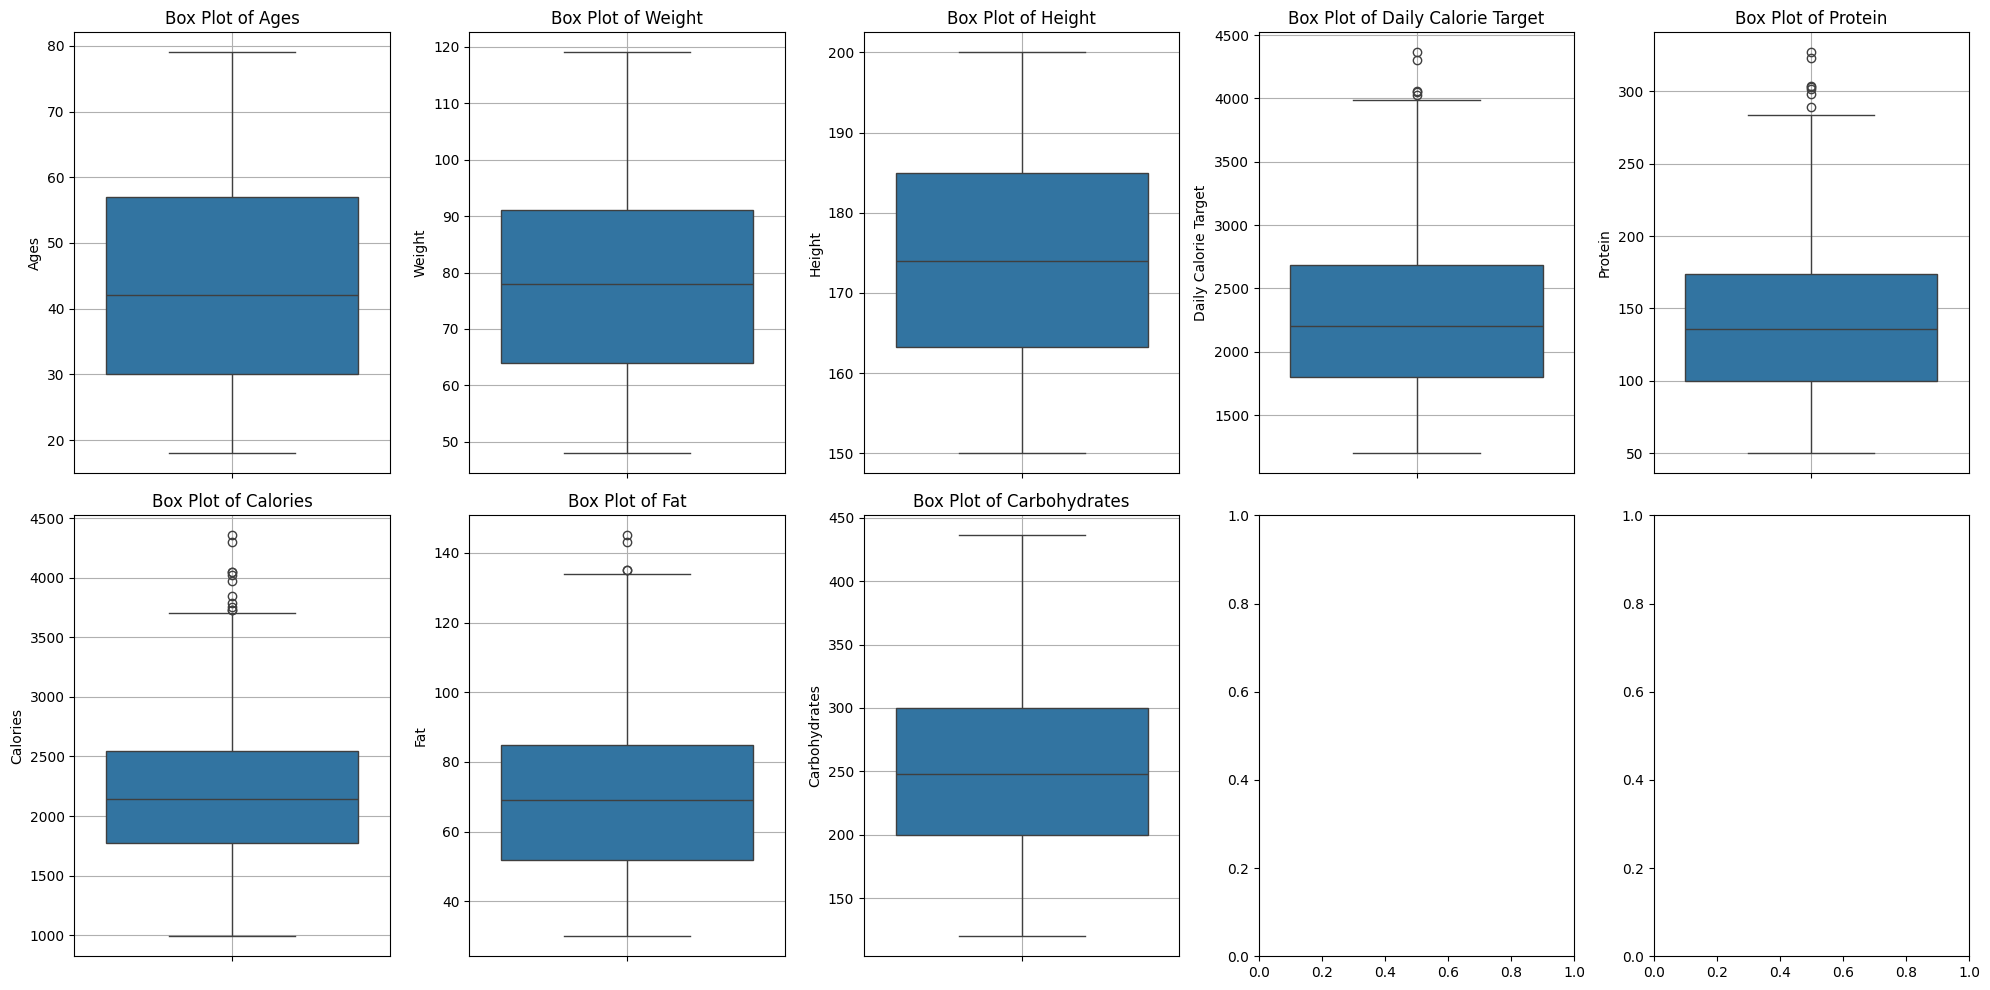

In [63]:
selected_numeric_columns = df_selected.columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(selected_numeric_columns):
    sns.boxplot(data=df_selected, y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)
    axes[i].grid()

plt.tight_layout()
plt.show()


In [64]:
# hapus outliers menggunakan metode IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

df_no_outliers = remove_outliers_iqr(df_selected, selected_numeric_columns)

print(f"Bentuk dataset asli: {df_selected.shape}")
print(f"Dataset setelah menghapus outliers: {df_no_outliers.shape}")
print(f"Menghapus {df_selected.shape[0] - df_no_outliers.shape[0]} baris dengan outliers")

Bentuk dataset asli: (1698, 8)
Dataset setelah menghapus outliers: (1687, 8)
Menghapus 11 baris dengan outliers


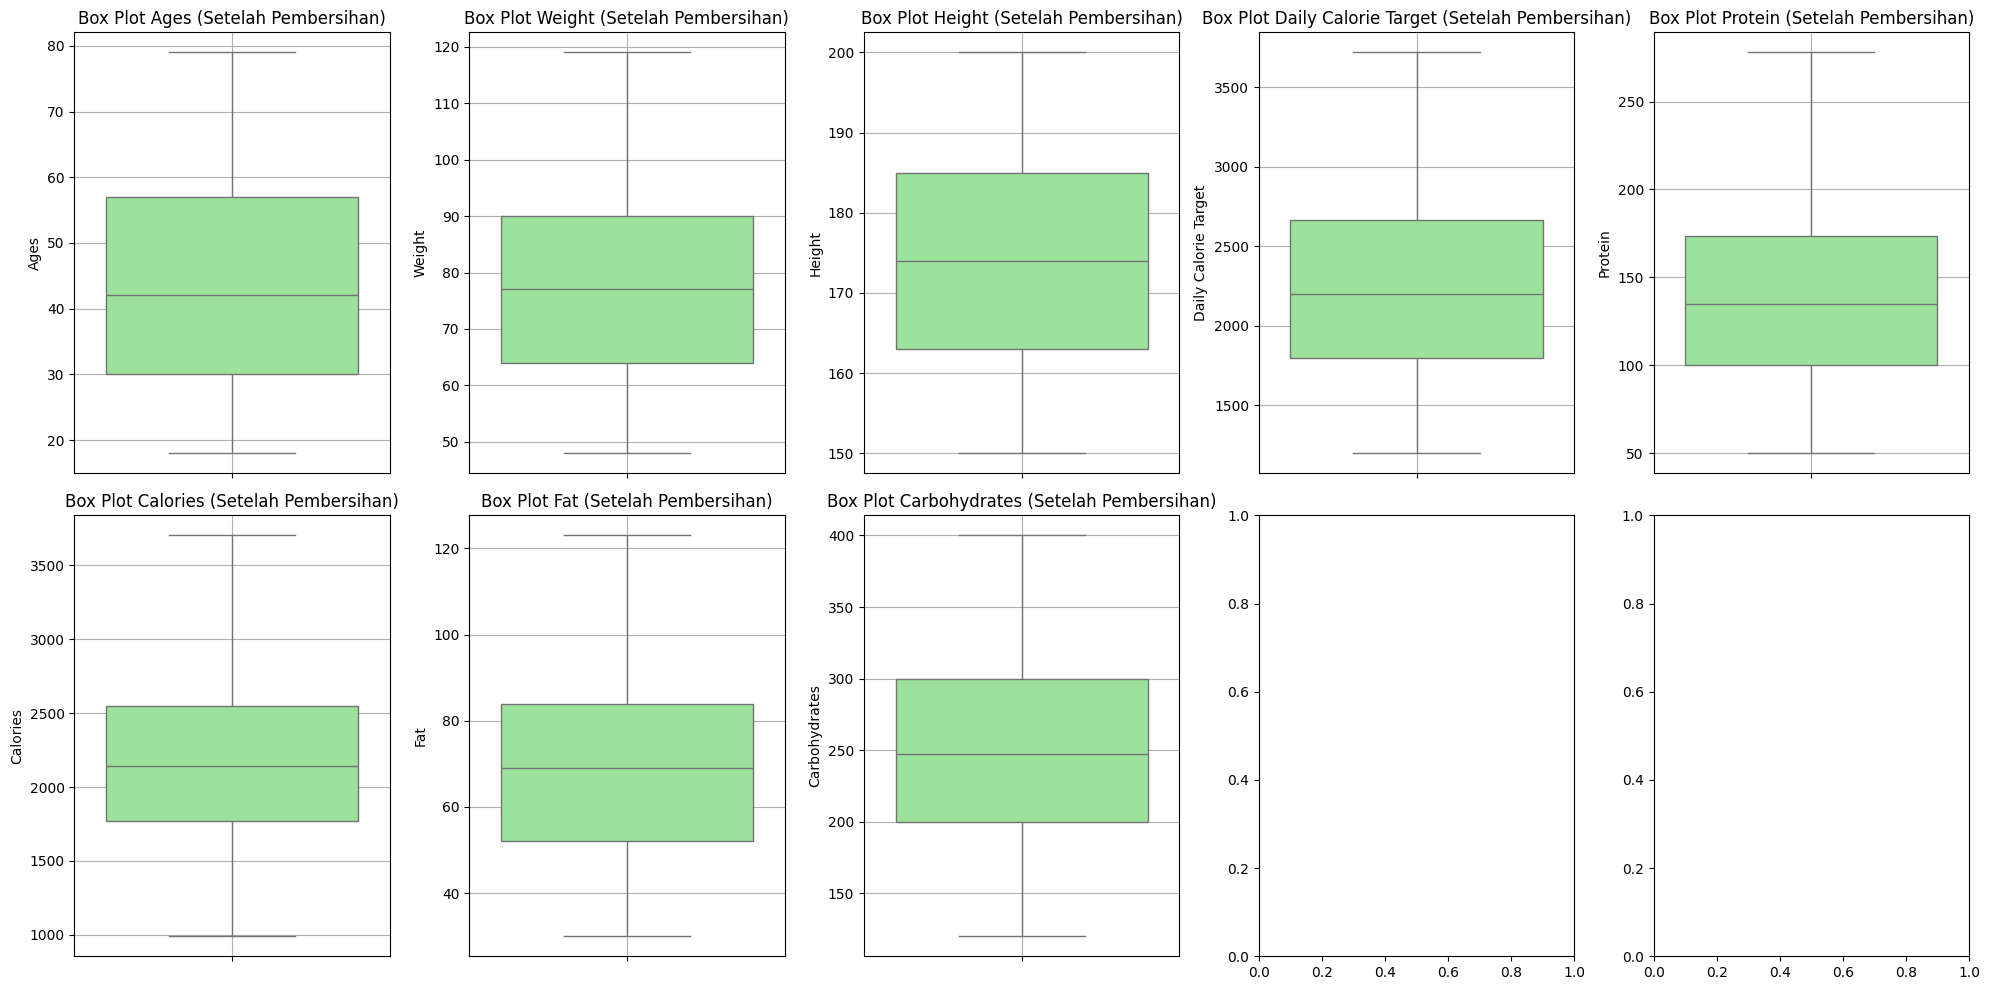

In [65]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(selected_numeric_columns):
    sns.boxplot(data=df_no_outliers, y=column, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box Plot {column} (Setelah Pembersihan)')
    axes[i].set_ylabel(column)
    axes[i].grid()

plt.tight_layout()
plt.show()

In [66]:
# hitung BMI untuk setiap entri 
df_no_outliers['BMI'] = df_no_outliers['Weight'] / (df_no_outliers['Height'] / 100) ** 2
df_no_outliers.head()

,Ages,Weight,Height,Daily Calorie Target,Protein,Calories,Fat,Carbohydrates,BMI
0,25,80,180,2000,120,2020,60,250,24.691358
1,32,65,165,1600,80,1480,40,200,23.875115
2,48,95,175,2200,100,2185,65,300,31.020408
3,55,70,160,2500,140,2680,80,350,27.343750
4,62,85,170,2000,80,1815,55,250,29.411765


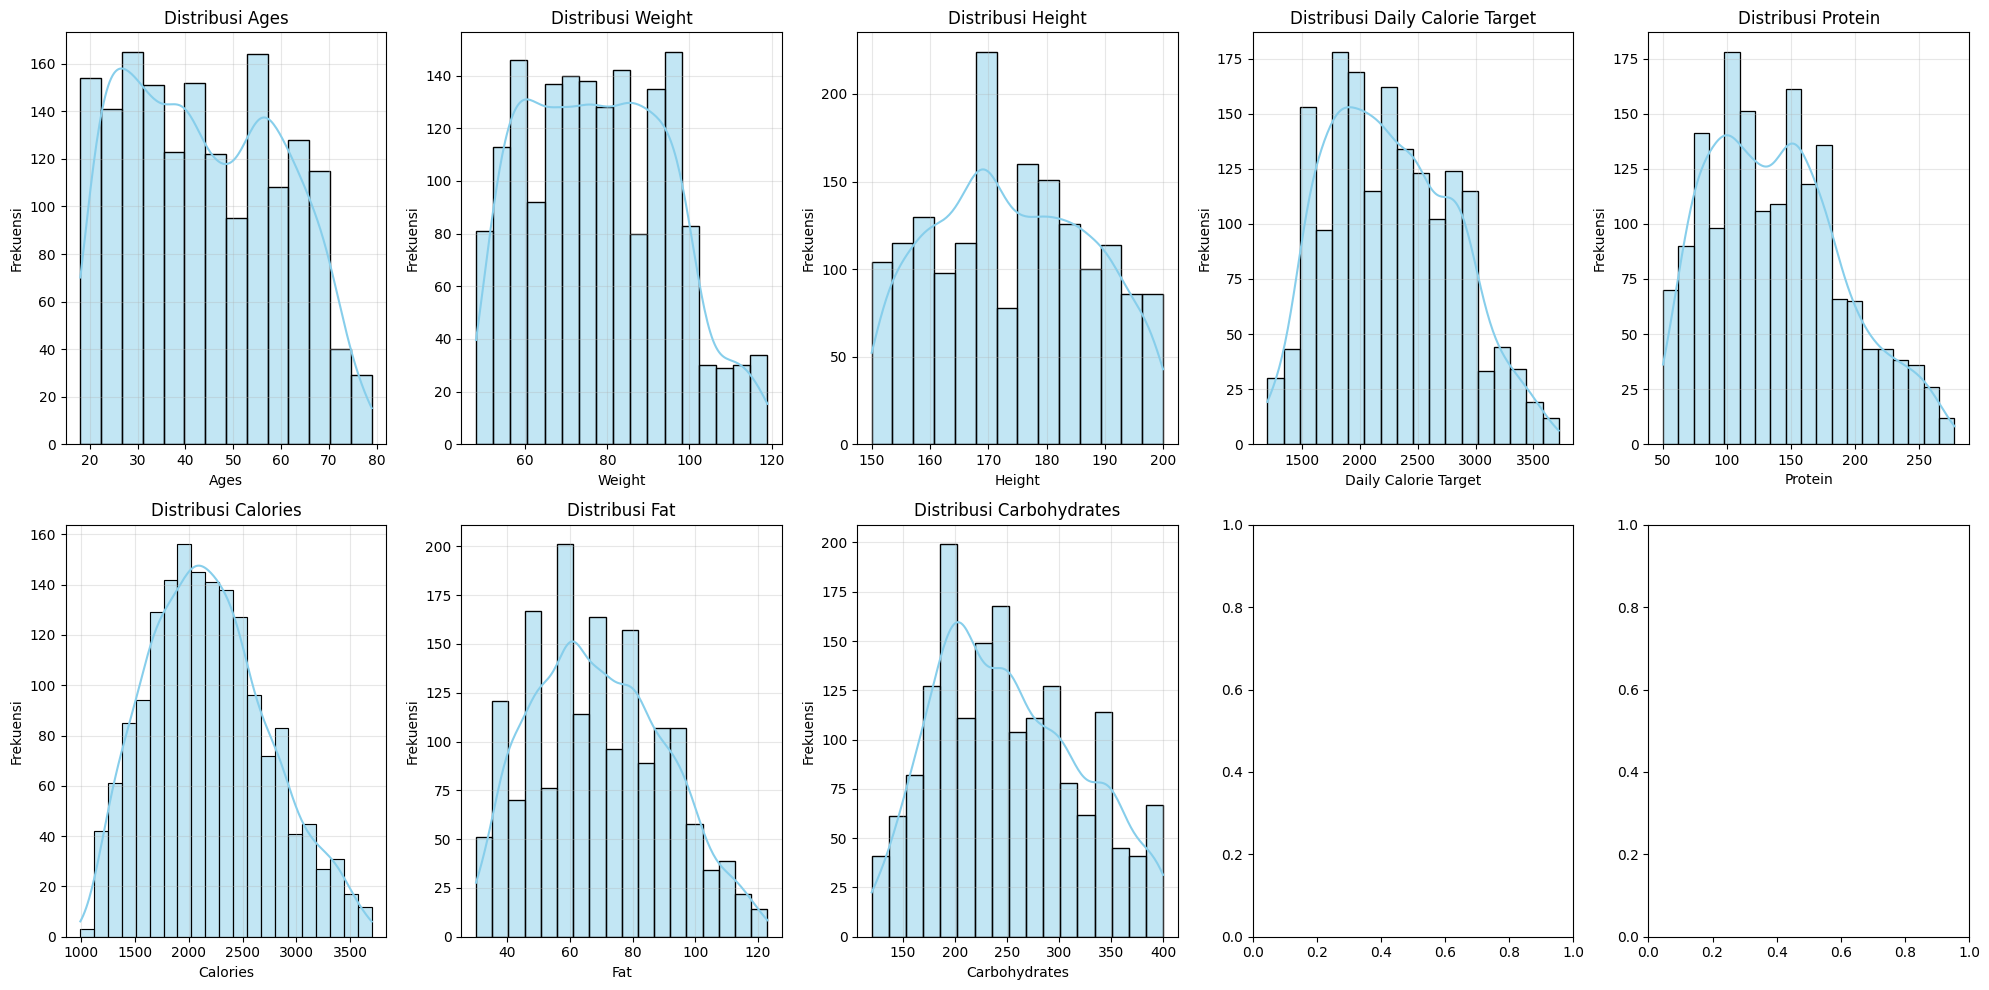

In [67]:
# Buat plot distribusi untuk semua kolom yang dipilih
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(selected_numeric_columns):
    sns.histplot(data=df_no_outliers, x=column, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 1. Linguistic Variables and Memberships

In [68]:
def bmi_underweight(bmi):
    if bmi <= 0:
        return 1
    elif 0 < bmi < 17:
        return 1
    elif 17 <= bmi < 18.5:
        return (18.5 - bmi) / (18.5 - 17)
    else:
        return 0

def bmi_normal(bmi):
    if bmi < 17:
        return 0
    elif 17 <= bmi < 18.5:
        return (bmi - 17) / (18.5 - 17)
    elif 18.5 <= bmi < 23:
        return 1
    elif 23 <= bmi < 24.9:
        return (24.9 - bmi) / (24.9 - 23)
    else:
        return 0

def bmi_overweight(bmi):
    if bmi < 23:
        return 0
    elif 23 <= bmi < 25:
        return (bmi - 23) / (25 - 23)
    elif 25 <= bmi < 28:
        return 1
    elif 28 <= bmi < 29.9:
        return (29.9 - bmi) / (29.9 - 28)
    else:
        return 0

def bmi_obese(bmi):
    if bmi < 28:
        return 0
    elif 28 <= bmi < 30:
        return (bmi - 28) / (30 - 28)
    elif 30 <= bmi <= 40:
        return 1
    else:
        return 0

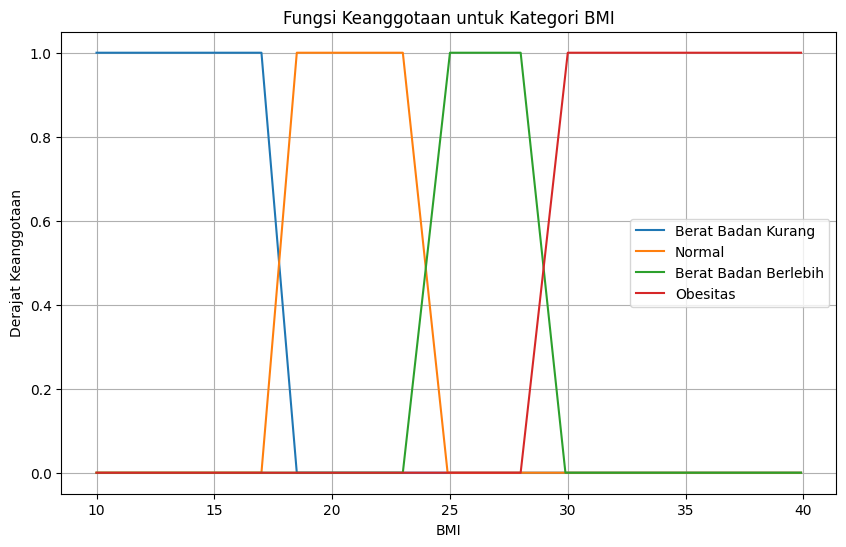

In [69]:
x_bmi = np.arange(10, 40, 0.1)

underweight = [bmi_underweight(x) for x in x_bmi]
normal = [bmi_normal(x) for x in x_bmi]
overweight = [bmi_overweight(x) for x in x_bmi]
obese = [bmi_obese(x) for x in x_bmi]

# Plot fungsi keanggotaan
plt.figure(figsize=(10, 6))
plt.plot(x_bmi, underweight, label='Berat Badan Kurang')
plt.plot(x_bmi, normal, label='Normal')
plt.plot(x_bmi, overweight, label='Berat Badan Berlebih')
plt.plot(x_bmi, obese, label='Obesitas')

plt.title('Fungsi Keanggotaan untuk Kategori BMI')
plt.xlabel('BMI')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
def young(age):
    if age <= 25: 
        return 1
    elif 25 < age <= 40:
        return (40 - age) / (40 - 25)
    else:
        return 0

def middle(age):
    if age <= 30 or age >= 60:
        return 0
    elif 30 < age <= 45:
        return (age - 30) / (45 - 30)
    elif 45 < age <= 60:
        return (60 - age) / (60 - 45)
    else:
        return 0

def senior(age):
    if age <= 50:
        return 0
    elif 50 < age <= 65:
        return (age - 50) / (65 - 50)
    elif 65 < age <= 80:
        return 1
    else:
        return 0

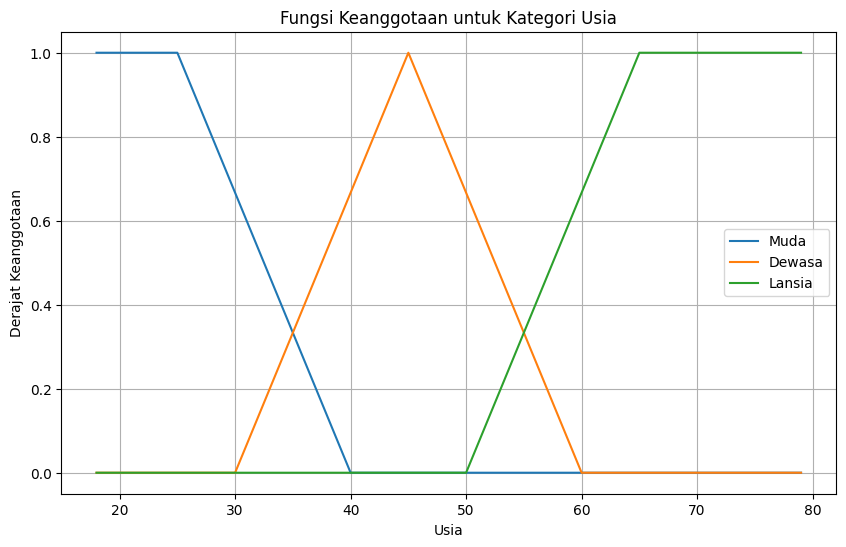

In [71]:
x_age = np.arange(18, 80, 1)
young_membership = [young(x) for x in x_age]
middle_membership = [middle(x) for x in x_age]
elderly_membership = [senior(x) for x in x_age]

# Plot fungsi keanggotaan
plt.figure(figsize=(10, 6))
plt.plot(x_age, young_membership, label='Muda')
plt.plot(x_age, middle_membership, label='Dewasa')
plt.plot(x_age, elderly_membership, label='Lansia')

plt.title('Fungsi Keanggotaan untuk Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
def low_calories(kcal):
    if kcal <= 1800:
        return 1
    elif 1800 < kcal <= 2000:
        return (2000 - kcal) / (2000 - 1800)
    else:
        return 0

def moderate_calories(kcal):
    if kcal <= 1600 or kcal >= 2600:
        return 0
    elif 1600 < kcal <= 2000:
        return (kcal - 1600) / (2000 - 1600)
    elif 2000 < kcal <= 2200:
        return 1
    elif 2200 < kcal <= 2600:
        return (2600 - kcal) / (2600 - 2200)
    else:
        return 0

def high_calories(kcal):
    if kcal <= 2200:
        return 0
    elif 2200 < kcal <= 2400:
        return (kcal - 2200) / (2400 - 2200)
    elif kcal > 2400:
        return 1
    else:
        return 0

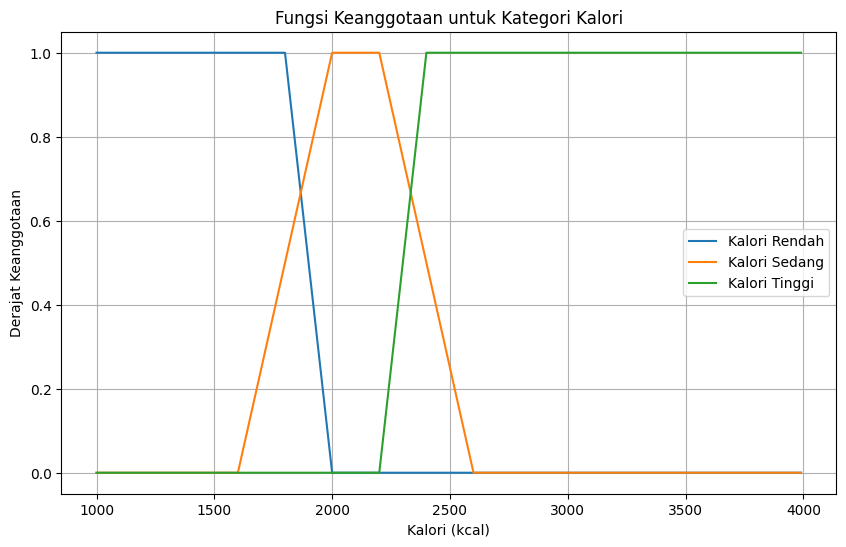

In [73]:
x_calories = np.arange(1000, 4000, 10)
low_cal_membership = [low_calories(x) for x in x_calories]
moderate_cal_membership = [moderate_calories(x) for x in x_calories]
high_cal_membership = [high_calories(x) for x in x_calories]

# Plot fungsi keanggotaan
plt.figure(figsize=(10, 6))
plt.plot(x_calories, low_cal_membership, label='Kalori Rendah')
plt.plot(x_calories, moderate_cal_membership, label='Kalori Sedang')
plt.plot(x_calories, high_cal_membership, label='Kalori Tinggi')

plt.title('Fungsi Keanggotaan untuk Kategori Kalori')
plt.xlabel('Kalori (kcal)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
def target_low(target):
    if target <= 1800:
        return 1
    elif 1800 < target <= 2000:
        return (2000 - target) / (2000 - 1800)
    else:
        return 0

def target_moderate(target):
    if target <= 1600 or target >= 2600:
        return 0
    elif 1600 < target <= 2000:
        return (target - 1600) / (2000 - 1600)
    elif 2000 < target <= 2200:
        return 1
    elif 2200 < target <= 2600:
        return (2600 - target) / (2600 - 2200)
    else:
        return 0

def target_high(target):
    if target <= 2200:
        return 0
    elif 2200 < target <= 2400:
        return (target - 2200) / (2400 - 2200)
    elif target > 2400:
        return 1
    else:
        return 0

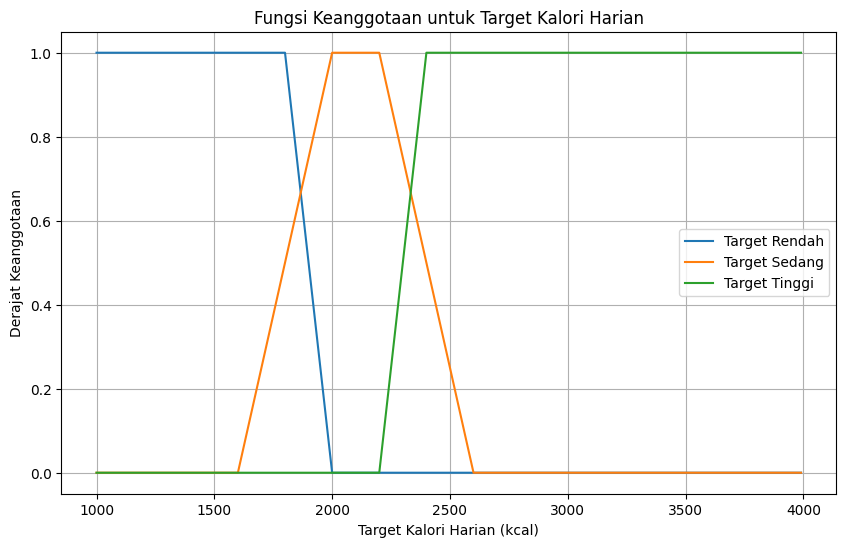

In [75]:
x_target = np.arange(1000, 4000, 10)
target_low_membership = [target_low(x) for x in x_target]
target_moderate_membership = [target_moderate(x) for x in x_target]
target_high_membership = [target_high(x) for x in x_target]

plt.figure(figsize=(10, 6))
plt.plot(x_target, target_low_membership, label='Target Rendah')
plt.plot(x_target, target_moderate_membership, label='Target Sedang')
plt.plot(x_target, target_high_membership, label='Target Tinggi')

plt.title('Fungsi Keanggotaan untuk Target Kalori Harian')
plt.xlabel('Target Kalori Harian (kcal)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
def protein_low(protein):
    if protein <= 70:
        return 1
    elif 70 < protein <= 100:
        return (100 - protein) / (100 - 70)
    else:
        return 0

def protein_moderate(protein):
    if protein <= 70 or protein >= 140:
        return 0
    elif 70 < protein <= 100:
        return (protein - 70) / (100 - 70)
    elif 100 < protein <= 140:
        return (140 - protein) / (140 - 100)
    else:
        return 0

def protein_high(protein):
    if protein <= 120:
        return 0
    elif 120 < protein <= 150:
        return (protein - 120) / (150 - 120)
    else:
        return 1

def carbs_low(carbs):
    if carbs <= 180:
        return 1
    elif 180 < carbs <= 250:
        return (250 - carbs) / (250 - 180)
    else:
        return 0

def carbs_moderate(carbs):
    if carbs <= 180 or carbs >= 350:
        return 0
    elif 180 < carbs <= 250:
        return (carbs - 180) / (250 - 180)
    elif 250 < carbs <= 350:
        return (350 - carbs) / (350 - 250)
    else:
        return 0

def carbs_high(carbs):
    if carbs <= 300:
        return 0
    elif 300 < carbs <= 350:
        return (carbs - 300) / (350 - 300)
    else:
        return 1

def fat_low(fat):
    if fat <= 45:
        return 1
    elif 45 < fat <= 65:
        return (65 - fat) / (65 - 45)
    else:
        return 0

def fat_moderate(fat):
    if fat <= 45 or fat >= 85:
        return 0
    elif 45 < fat <= 65:
        return (fat - 45) / (65 - 45)
    elif 65 < fat <= 85:
        return (85 - fat) / (85 - 65)
    else:
        return 0

def fat_high(fat):
    if fat <= 75:
        return 0
    elif 75 < fat <= 90:
        return (fat - 75) / (90 - 75)
    else:
        return 1


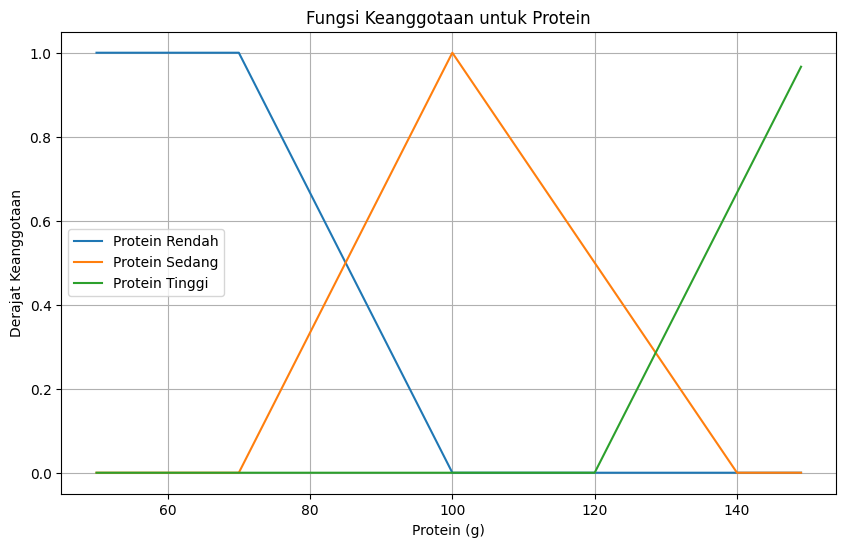

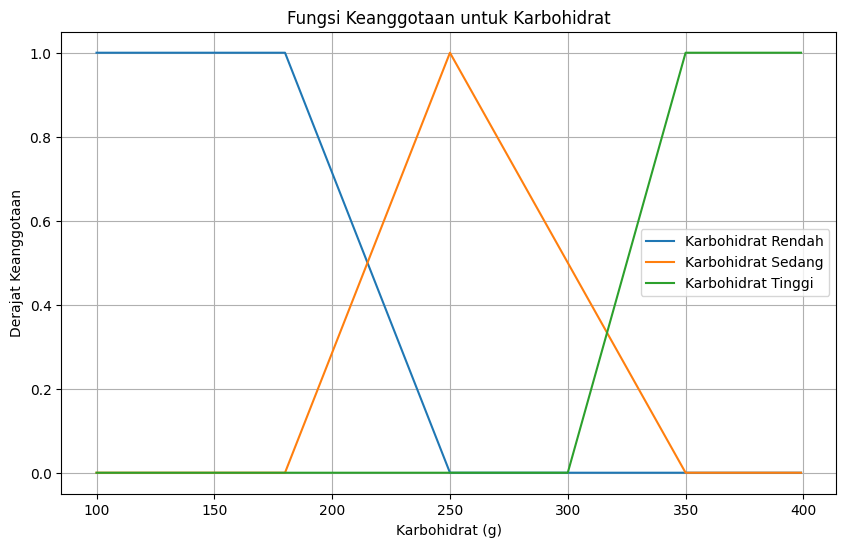

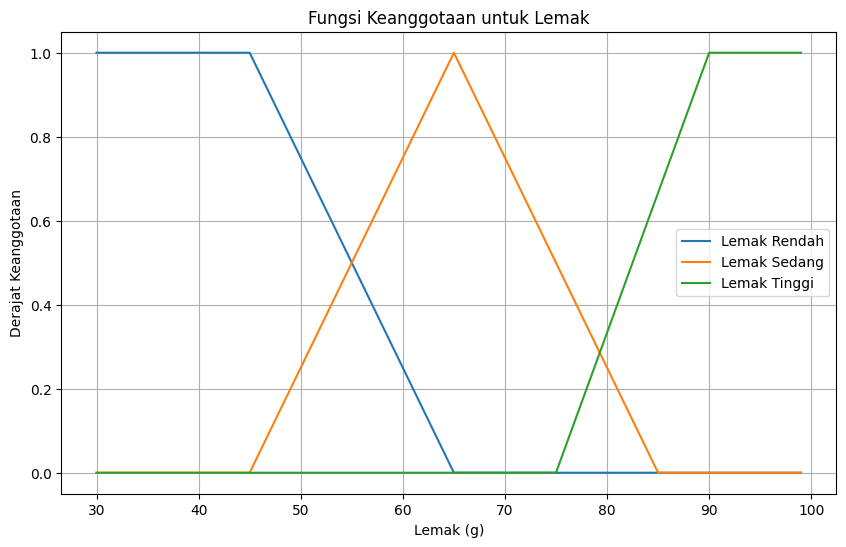

In [77]:
# Visualisasi Protein
x_protein = np.arange(50, 150, 1)
protein_low_membership = [protein_low(x) for x in x_protein]
protein_moderate_membership = [protein_moderate(x) for x in x_protein]
protein_high_membership = [protein_high(x) for x in x_protein]

plt.figure(figsize=(10, 6))
plt.plot(x_protein, protein_low_membership, label='Protein Rendah')
plt.plot(x_protein, protein_moderate_membership, label='Protein Sedang')
plt.plot(x_protein, protein_high_membership, label='Protein Tinggi')

plt.title('Fungsi Keanggotaan untuk Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi Karbohidrat
x_carbs = np.arange(100, 400, 1)
carbs_low_membership = [carbs_low(x) for x in x_carbs]
carbs_moderate_membership = [carbs_moderate(x) for x in x_carbs]
carbs_high_membership = [carbs_high(x) for x in x_carbs]

plt.figure(figsize=(10, 6))
plt.plot(x_carbs, carbs_low_membership, label='Karbohidrat Rendah')
plt.plot(x_carbs, carbs_moderate_membership, label='Karbohidrat Sedang')
plt.plot(x_carbs, carbs_high_membership, label='Karbohidrat Tinggi')

plt.title('Fungsi Keanggotaan untuk Karbohidrat')
plt.xlabel('Karbohidrat (g)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi Lemak
x_fat = np.arange(30, 100, 1)
fat_low_membership = [fat_low(x) for x in x_fat]
fat_moderate_membership = [fat_moderate(x) for x in x_fat]
fat_high_membership = [fat_high(x) for x in x_fat]

plt.figure(figsize=(10, 6))
plt.plot(x_fat, fat_low_membership, label='Lemak Rendah')
plt.plot(x_fat, fat_moderate_membership, label='Lemak Sedang')
plt.plot(x_fat, fat_high_membership, label='Lemak Tinggi')

plt.title('Fungsi Keanggotaan untuk Lemak')
plt.xlabel('Lemak (g)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# 2. Fuzzification

In [78]:
def fuzzify_bmi(bmi_value):
    return {
        'underweight': bmi_underweight(bmi_value),
        'normal': bmi_normal(bmi_value),
        'overweight': bmi_overweight(bmi_value),
        'obese': bmi_obese(bmi_value)
    }

def fuzzify_age(age_value):
    return {
        'young': young(age_value),
        'middle': middle(age_value),
        'senior': senior(age_value)
    }

def fuzzify_calorie_target(target_value):
    return {
        'target_low': target_low(target_value),
        'target_moderate': target_moderate(target_value),
        'target_high': target_high(target_value)
    }

def fuzzify_calories(calorie_value):
    return {
        'cal_low': low_calories(calorie_value),
        'cal_moderate': moderate_calories(calorie_value),
        'cal_high': high_calories(calorie_value),
    }

def fuzzify_protein(protein_value):
    return {
        'prot_low': protein_low(protein_value),
        'prot_moderate': protein_moderate(protein_value),
        'prot_high': protein_high(protein_value),
    }

def fuzzify_carbs(carbs_value):
    return {
        'carb_low': carbs_low(carbs_value),
        'carb_moderate': carbs_moderate(carbs_value),
        'carb_high': carbs_high(carbs_value),
    }

def fuzzify_fat(fat_value):
    return {
        'fat_low': fat_low(fat_value),
        'fat_moderate': fat_moderate(fat_value),
        'fat_high': fat_high(fat_value),
    }


def bmi_fuzzification(bmi):
    fuzzified_bmi = fuzzify_bmi(bmi)
    df = pd.DataFrame([fuzzified_bmi])
    df.index = [f"BMI: {bmi}"]
    return df

def age_fuzzification(age):
    fuzzified_age = fuzzify_age(age)
    df = pd.DataFrame([fuzzified_age])
    df.index = [f"Age: {age}"]
    return df

def calorie_fuzzification(calories):
    fuzzified_calories = fuzzify_calories(calories)
    df = pd.DataFrame([fuzzified_calories])
    df.index = [f"Calories: {calories}"]
    return df

def target_fuzzification(target):
    fuzzified_target = fuzzify_calorie_target(target)
    df = pd.DataFrame([fuzzified_target])
    df.index = [f"Target: {target}"]
    return df

def protein_fuzzification(protein):
    fuzzified_protein = fuzzify_protein(protein)
    df = pd.DataFrame([fuzzified_protein])
    df.index = [f"Protein: {protein}"]
    return df

def carbs_fuzzification(carbs):
    fuzzified_carbs = fuzzify_carbs(carbs)
    df = pd.DataFrame([fuzzified_carbs])
    df.index = [f"Carbs: {carbs}"]
    return df

def fat_fuzzification(fat):
    fuzzified_fat = fuzzify_fat(fat)
    df = pd.DataFrame([fuzzified_fat])
    df.index = [f"Fat: {fat}"]
    return df

In [79]:
bmi_fuzzification(22.5)

,underweight,normal,overweight,obese
BMI: 22.5,0,1,0,0


In [80]:
age_fuzzification(30)

,young,middle,senior
Age: 30,0.666667,0,0


In [81]:
calorie_fuzzification(1850)

,cal_low,cal_moderate,cal_high
Calories: 1850,0.75,0.625,0


# 3. Inference

In [82]:
bmi_terms = {
    "underweight": bmi_underweight, 
    "normal": bmi_normal,
    "overweight": bmi_overweight,
    "obese": bmi_obese,
}

age_terms = {
    "young": young,
    "middle": middle,
    "senior": senior,
}

# output terms
calorie_terms = {
    "low": low_calories,
    "moderate": moderate_calories,
    "high": high_calories,
}

calorie_output_terms = ["cal_low", "cal_moderate", "cal_high"]
protein_output_terms = ["prot_low", "prot_moderate", "prot_high"] 
carbs_output_terms = ["carb_low", "carb_moderate", "carb_high"]   
fat_output_terms = ["fat_low", "fat_moderate", "fat_high"]       

In [ ]:
def fuzzy_rules_3in4out(bmi_value, age_value, target_value):
    # Fuzzifikasi input
    bmi_membership = fuzzify_bmi(bmi_value)
    age_membership = fuzzify_age(age_value)
    target_membership = fuzzify_calorie_target(target_value)

    # Inisialisasi agregasi output untuk semua variabel output
    output_agg = {
        'Calories': {term: 0 for term in calorie_output_terms},
        'Protein': {term: 0 for term in protein_output_terms},
        'Carbohydrates': {term: 0 for term in carbs_output_terms},
        'Fat': {term: 0 for term in fat_output_terms}
    }

    # --- Aturan BMI Underweight (Kurus) ---
    # Orang kurus membutuhkan lebih banyak kalori untuk menambah berat badan
    if bmi_membership['underweight'] > 0:
        # Muda (Young)
        if age_membership['young'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Paruh baya (Middle)
        if age_membership['middle'] > 0:
             if target_membership['target_low'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
             if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
             if target_membership['target_high'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Lansia (Senior)
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)

    # --- Aturan BMI Normal ---
    # Orang dengan BMI normal membutuhkan nutrisi seimbang sesuai aktivitas
    if bmi_membership['normal'] > 0:
        # Muda (Young)
        if age_membership['young'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Paruh baya (Middle)
        if age_membership['middle'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)
        # Lansia (Senior)
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['normal'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['normal'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['normal'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)

    # --- Aturan BMI Overweight (Kelebihan Berat Badan) ---
    # Fokus pada pembatasan kalori dan lemak untuk menurunkan berat badan
    if bmi_membership['overweight'] > 0:
        # Muda (Young)
        if age_membership['young'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
        # Paruh baya (Middle)
        if age_membership['middle'] > 0:
             if target_membership['target_low'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
             if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
             if target_membership['target_high'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
        # Lansia (Senior)
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    # --- Aturan BMI Obese (Obesitas) ---
    # Prioritas utama adalah pengurangan kalori drastis dengan nutrisi terkontrol
    if bmi_membership['obese'] > 0:
        # Muda (Young)
        if age_membership['young'] > 0:
             if target_membership['target_low'] > 0:
                strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
             if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
             if target_membership['target_high'] > 0:
                strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)
        # Paruh baya (Middle)
        if age_membership['middle'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['obese'], age_membership['middle'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['obese'], age_membership['middle'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['obese'], age_membership['middle'], target_membership['target_high'])
                output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
                output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
                output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

        # Lansia (Senior)
        if age_membership['senior'] > 0:
            if target_membership['target_low'] > 0:
                strength = min(bmi_membership['obese'], age_membership['senior'], target_membership['target_low'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_moderate'] > 0:
                strength = min(bmi_membership['obese'], age_membership['senior'], target_membership['target_moderate'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)
            if target_membership['target_high'] > 0:
                strength = min(bmi_membership['obese'], age_membership['senior'], target_membership['target_high'])
                output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
                output_agg['Protein']['prot_low'] = max(output_agg['Protein']['prot_low'], strength)
                output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
                output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    # --- Aturan Khusus untuk Optimasi Nutrisi ---
    
    # Jika BMI Normal DAN Muda DAN Target Tinggi, berikan nutrisi maksimal untuk aktivitas intensif
    strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_high'])
    output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
    output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
    output_agg['Carbohydrates']['carb_high'] = max(output_agg['Carbohydrates']['carb_high'], strength)
    output_agg['Fat']['fat_high'] = max(output_agg['Fat']['fat_high'], strength)

    # Jika BMI Normal DAN Paruh Baya DAN Target Moderat, pastikan kalori seimbang untuk metabolisme yang mulai melambat
    strength = min(bmi_membership['normal'], age_membership['middle'], target_membership['target_moderate'])
    output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)

    # Jika Obesitas DAN Muda DAN Target Moderat, fokus pada protein tinggi untuk mempertahankan massa otot saat defisit kalori
    strength = min(bmi_membership['obese'], age_membership['young'], target_membership['target_moderate'])
    output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength) # Meski target moderat, obesitas perlu kalori rendah
    output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
    output_agg['Carbohydrates']['carb_low'] = max(output_agg['Carbohydrates']['carb_low'], strength)
    output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    # Jika Underweight DAN Lansia DAN Target Tinggi, prioritas pembentukan massa otot dengan hati-hati
    strength = min(bmi_membership['underweight'], age_membership['senior'], target_membership['target_high'])
    output_agg['Calories']['cal_high'] = max(output_agg['Calories']['cal_high'], strength)
    output_agg['Protein']['prot_high'] = max(output_agg['Protein']['prot_high'], strength)
    output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
    output_agg['Fat']['fat_moderate'] = max(output_agg['Fat']['fat_moderate'], strength)

    # Jika Overweight DAN Lansia DAN Target Tinggi, seimbangkan penurunan berat dengan kebutuhan aktivitas
    strength = min(bmi_membership['overweight'], age_membership['senior'], target_membership['target_high'])
    output_agg['Calories']['cal_moderate'] = max(output_agg['Calories']['cal_moderate'], strength)
    output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
    output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
    output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    # Jika BMI Normal DAN Muda DAN Target Rendah, pertahankan asupan minimal untuk kesehatan dasar
    strength = min(bmi_membership['normal'], age_membership['young'], target_membership['target_low'])
    output_agg['Calories']['cal_low'] = max(output_agg['Calories']['cal_low'], strength)
    output_agg['Protein']['prot_moderate'] = max(output_agg['Protein']['prot_moderate'], strength)
    output_agg['Carbohydrates']['carb_moderate'] = max(output_agg['Carbohydrates']['carb_moderate'], strength)
    output_agg['Fat']['fat_low'] = max(output_agg['Fat']['fat_low'], strength)

    return output_agg

# test aturan
sample_bmi = 22.5
sample_age = 30
sample_target = 2100

rule_output_3in4out = fuzzy_rules_3in4out(sample_bmi, sample_age, sample_target)

print(f"Untuk BMI={sample_bmi}, Umur={sample_age}, Target={sample_target}:")
for output_var, memberships in rule_output_3in4out.items():
    print(f"\nKeanggotaan {output_var}:")
    for term, degree in memberships.items():
        print(f"  {term}: {degree:.3f}")

Untuk BMI=22.5, Umur=30, Target=2100:

Keanggotaan Calories:
  cal_low: 0.000
  cal_moderate: 0.667
  cal_high: 0.000

Keanggotaan Protein:
  prot_low: 0.000
  prot_moderate: 0.667
  prot_high: 0.000

Keanggotaan Carbohydrates:
  carb_low: 0.000
  carb_moderate: 0.667
  carb_high: 0.000

Keanggotaan Fat:
  fat_low: 0.000
  fat_moderate: 0.667
  fat_high: 0.000


# 4. Defuzzification (Mamdani)

In [84]:
# Rentang sampel untuk defuzzifikasi
z_samples_calories = np.arange(1000, 4000, 10)
z_samples_protein = np.arange(50, 150, 1)
z_samples_carbs = np.arange(100, 400, 1)
z_samples_fat = np.arange(30, 100, 1)

z_samples_dict = {
    'Calories': z_samples_calories,
    'Protein': z_samples_protein,
    'Carbohydrates': z_samples_carbs,
    'Fat': z_samples_fat
}


In [85]:
mamdani_output_funcs = {
    'Calories': {'cal_low': low_calories, 'cal_moderate': moderate_calories, 'cal_high': high_calories},
    'Protein': {'prot_low': protein_low, 'prot_moderate': protein_moderate, 'prot_high': protein_high},
    'Carbohydrates': {'carb_low': carbs_low, 'carb_moderate': carbs_moderate, 'carb_high': carbs_high},
    'Fat': {'fat_low': fat_low, 'fat_moderate': fat_moderate, 'fat_high': fat_high}
}

In [86]:
def mamdani_defuzzification_4out(output_agg, z_samples_dict, output_funcs):
    crisp_outputs = {}
    for output_var, memberships in output_agg.items():
        z_samples = z_samples_dict[output_var]
        output_term_funcs = output_funcs[output_var]

        # Agregasi fungsi keanggotaan output untuk variabel output saat ini
        aggregated_mf = []
        for z in z_samples:
            max_degree = 0
            for term, threshold in memberships.items():
                max_degree = max(max_degree, min(output_term_funcs[term](z), threshold)) # Implikasi (min) + Agregasi (max)
            aggregated_mf.append(max_degree)

        # Defuzzifikasi menggunakan Centroid of Area (COA)
        sum_max_membership = sum(aggregated_mf)
        sum_zi_max_membership = sum(z_samples[i] * aggregated_mf[i] for i in range(len(z_samples)))

        crisp_output = sum_zi_max_membership / sum_max_membership if sum_max_membership != 0 else 0
        crisp_outputs[output_var] = crisp_output

    return crisp_outputs

# Uji Defuzzifikasi Mamdani
rule_output_3in4out = fuzzy_rules_3in4out(sampel_bmi, sampel_umur, sampel_target)
mamdani_crisp_output = mamdani_defuzzification_4out(rule_output_3in4out, z_samples_dict, mamdani_output_funcs)

print(f"Output Crisp Mamdani:")
for output_var, value in mamdani_crisp_output.items():
     print(f" {output_var}: {value:.2f}")

Output Crisp Mamdani:
 Calories: 2100.00
 Protein: 103.61
 Carbohydrates: 260.83
 Fat: 65.00


In [87]:
def maximize_threshold(z_samples, output_membership):
    clipped = {}
    for term, threshold in output_membership.items():
        clipped[term] = [min(calorie_terms[term](z), threshold) for z in z_samples]
    df = pd.DataFrame(clipped, index=z_samples)
    return clipped, df

clipped_membership, clipped_df = maximize_threshold(z_samples_calories, fuzzy_rules(sample_bmi, sample_age))
clipped_df

,low,moderate,high
1000,0.0,0.0,0
1010,0.0,0.0,0
1020,0.0,0.0,0
1030,0.0,0.0,0
1040,0.0,0.0,0
...,...,...,...
3950,0.0,0.0,0
3960,0.0,0.0,0
3970,0.0,0.0,0
3980,0.0,0.0,0


In [88]:
clipped_df['Max Membership'] = clipped_df.max(axis=1)
clipped_df

,low,moderate,high,Max Membership
1000,0.0,0.0,0,0.0
1010,0.0,0.0,0,0.0
1020,0.0,0.0,0,0.0
1030,0.0,0.0,0,0.0
1040,0.0,0.0,0,0.0
...,...,...,...,...
3950,0.0,0.0,0,0.0
3960,0.0,0.0,0,0.0
3970,0.0,0.0,0,0.0
3980,0.0,0.0,0,0.0


In [89]:
clipped_df['zi * Max Membership'] = clipped_df.index * clipped_df['Max Membership']

# Hitung jumlah
sum_max_membership = clipped_df['Max Membership'].sum()
sum_zi_max_membership = clipped_df['zi * Max Membership'].sum()

# Tambahkan baris ringkasan
summary_row = pd.DataFrame(
    {
        'Max Membership': [sum_max_membership],
        'zi * Max Membership': [sum_zi_max_membership]
    },
    index=['Jumlah']
)

# Tampilkan tabel dengan baris ringkasan
display(pd.concat([clipped_df, summary_row]))

,low,moderate,high,Max Membership,zi * Max Membership
1000,0.0,0.0,0.0,0.000000,0.0
1010,0.0,0.0,0.0,0.000000,0.0
1020,0.0,0.0,0.0,0.000000,0.0
1030,0.0,0.0,0.0,0.000000,0.0
1040,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...
3960,0.0,0.0,0.0,0.000000,0.0
3970,0.0,0.0,0.0,0.000000,0.0
3980,0.0,0.0,0.0,0.000000,0.0
3990,0.0,0.0,0.0,0.000000,0.0


In [90]:
crisp_output = sum_zi_max_membership / sum_max_membership if sum_max_membership != 0 else 0
print(f"Crisp Output (Rekomendasi Asupan Kalori): {crisp_output:.2f}g")

Crisp Output (Rekomendasi Asupan Kalori): 2100.00g


# 4. Defuzzification (Sugeno)

In [91]:
constants_outputs = {
    'Calories': {"cal_low": 1400, "cal_moderate": 2100, "cal_high": 2800},
    'Protein': {"prot_low": 70, "prot_moderate": 100, "prot_high": 130},
    'Carbohydrates': {"carb_low": 180, "carb_moderate": 250, "carb_high": 320},
    'Fat': {"fat_low": 45, "fat_moderate": 65, "fat_high": 85}
}

In [92]:
def crisp_output_sugeno_4out(output_agg, constants):
    crisp_outputs = {}
    for output_var, memberships in output_agg.items():
        weighted_sum = sum(constants[term] * degree for term, degree in memberships.items())
        sum_memberships = sum(memberships.values())

        crisp_output = weighted_sum / sum_memberships if sum_memberships != 0 else 0
        crisp_outputs[output_var] = crisp_output

    return crisp_outputs

In [93]:
def crisp_output_sugeno_4out(output_agg, constants):
    crisp_outputs = {}
    for output_var, memberships in output_agg.items():
        weighted_sum = sum(constants[output_var][term] * degree for term, degree in memberships.items())
        sum_memberships = sum(memberships.values())

        crisp_output = weighted_sum / sum_memberships if sum_memberships != 0 else 0
        crisp_outputs[output_var] = crisp_output

    return crisp_outputs

sugeno_crisp_output = crisp_output_sugeno_4out(rule_output_3in4out, constants_outputs)

print(f"Sugeno Crisp Outputs:")
for output_var, value in sugeno_crisp_output.items():
    print(f" {output_var}: {value:.2f}")

Sugeno Crisp Outputs:
 Calories: 2100.00
 Protein: 100.00
 Carbohydrates: 250.00
 Fat: 65.00


# 5. Evaluation

In [103]:
# Implemementasi hasil prediksi untuk evaluasi dan analisis lebih mendalam
mamdani_continuous_preds = {var: [] for var in rule_output_3in4out.keys()}
sugeno_continuous_preds = {var: [] for var in rule_output_3in4out.keys()}
actual_continuous = {var: [] for var in rule_output_3in4out.keys()}

# Gunakan subset data untuk demonstrasi (100 sampel pertama)
demo_data = evaluation_data.head(100)

print("=== IMPLEMENTASI HASIL PREDIKSI ===\n")
print(f"{'No':<3} {'BMI':<6} {'Umur':<4} {'Target':<6} {'Aktual_Kal':<10} {'Mamdani_Kal':<12} {'Sugeno_Kal':<11} {'Aktual_Prot':<11} {'Mamdani_Prot':<13} {'Sugeno_Prot':<12} {'Aktual_Karb':<11} {'Mamdani_Karb':<13} {'Sugeno_Karb':<12} {'Aktual_Lemak':<10} {'Mamdani_Lemak':<12} {'Sugeno_Lemak':<11}")
print("="*170)

for idx, (_, row) in enumerate(demo_data.iterrows()):
    if idx >= 10:  # Tampilkan hanya 10 contoh pertama
        break
        
    bmi = row['Weight'] / ((row['Height']/100) ** 2)
    age = row['Ages']
    target = row['Daily Calorie Target']
    
    # Dapatkan output aturan
    rule_result = fuzzy_rules_3in4out(bmi, age, target)
    
    # Defuzzifikasi Mamdani
    mamdani_crisp = mamdani_defuzzification_4out(rule_result, z_samples_dict, mamdani_output_funcs)
    
    # Defuzzifikasi Sugeno
    sugeno_crisp = crisp_output_sugeno_4out(rule_result, constants_outputs)
    
    # Simpan prediksi
    for var in mamdani_continuous_preds.keys():
        mamdani_continuous_preds[var].append(mamdani_crisp.get(var, 0))
        sugeno_continuous_preds[var].append(sugeno_crisp.get(var, 0))
        
        if var == 'Calories':
            actual_continuous[var].append(row['Calories'])
        elif var == 'Protein':
            actual_continuous[var].append(row['Protein'])
        elif var == 'Carbohydrates':
            actual_continuous[var].append(row['Carbohydrates'])
        elif var == 'Fat':
            actual_continuous[var].append(row['Fat'])
    
    # Cetak contoh hasil
    print(f"{idx+1:<3} {bmi:<6.1f} {age:<4} {target:<6} {row['Calories']:<10.1f} {mamdani_crisp['Calories']:<12.1f} {sugeno_crisp['Calories']:<11.1f} {row['Protein']:<11.1f} {mamdani_crisp['Protein']:<13.1f} {sugeno_crisp['Protein']:<12.1f} {row['Carbohydrates']:<11.1f} {mamdani_crisp['Carbohydrates']:<13.1f} {sugeno_crisp['Carbohydrates']:<12.1f} {row['Fat']:<10.1f} {mamdani_crisp['Fat']:<12.1f} {sugeno_crisp['Fat']:<11.1f}")

=== IMPLEMENTASI HASIL PREDIKSI ===

No  BMI    Umur Target Aktual_Kal Mamdani_Kal  Sugeno_Kal  Aktual_Prot Mamdani_Prot  Sugeno_Prot  Aktual_Karb Mamdani_Karb  Sugeno_Karb  Aktual_Lemak Mamdani_Lemak Sugeno_Lemak
1   24.7   25   2000   2020.0     2100.0       2100.0      120.0       103.4         100.0        250.0       260.2         250.0        60.0       65.0         65.0       
2   23.9   32   1600   1480.0     1471.3       1400.0      80.0        103.8         100.0        200.0       217.5         218.5        40.0       44.7         45.0       
3   31.0   48   2200   2185.0     1458.6       1400.0      100.0       103.4         100.0        300.0       161.8         180.0        65.0       43.6         45.0       
4   27.3   55   2500   2680.0     1764.6       1750.0      140.0       112.1         115.0        350.0       258.6         256.4        80.0       55.6         55.0       
5   29.4   62   2000   1815.0     1463.1       1400.0      80.0        81.8          78.0     

Perbandingan Akurasi Model (Skor F1 Tertimbang):

--- Calories ---
 Skor F1 Mamdani: 0.4623
 Skor F1 Sugeno: 0.4621
--- Protein ---
 Skor F1 Mamdani: 0.4297
 Skor F1 Sugeno: 0.4513
--- Carbohydrates ---
 Skor F1 Mamdani: 0.4756
 Skor F1 Sugeno: 0.4912
--- Fat ---
 Skor F1 Mamdani: 0.4144
 Skor F1 Sugeno: 0.4109

--- Keseluruhan ---
 Rata-rata Skor F1 Tertimbang Mamdani: 0.4455
 Rata-rata Skor F1 Tertimbang Sugeno: 0.4539

Model dengan performa terbaik secara keseluruhan: Sugeno


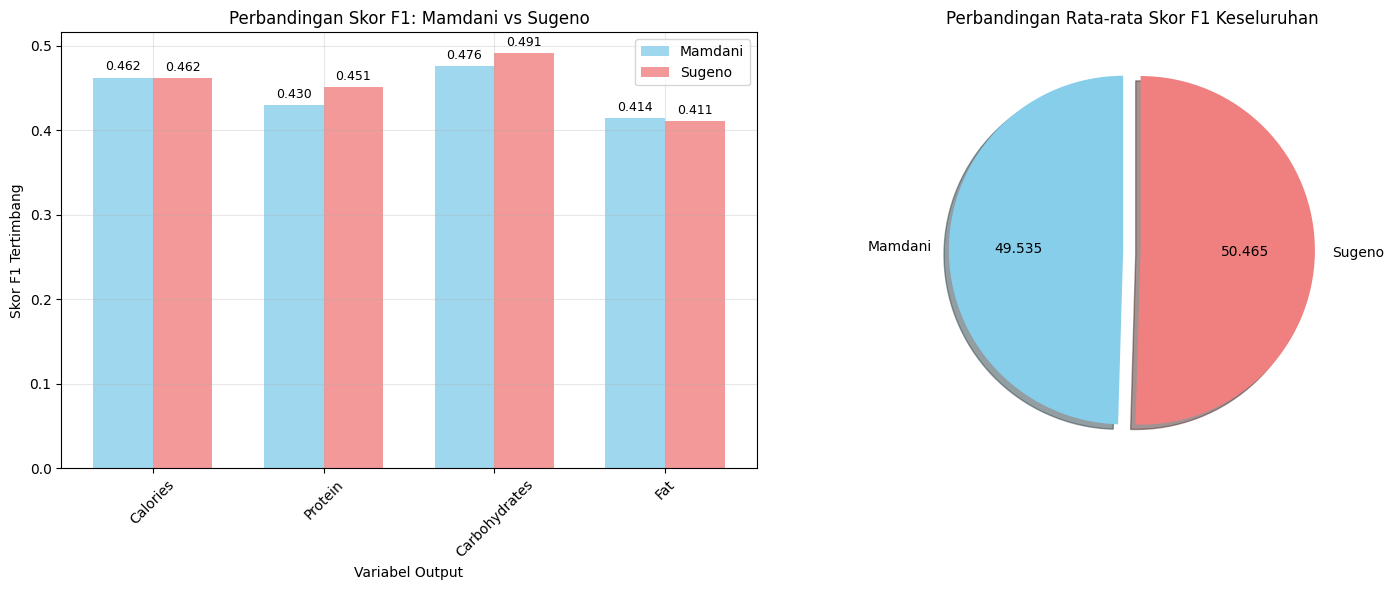

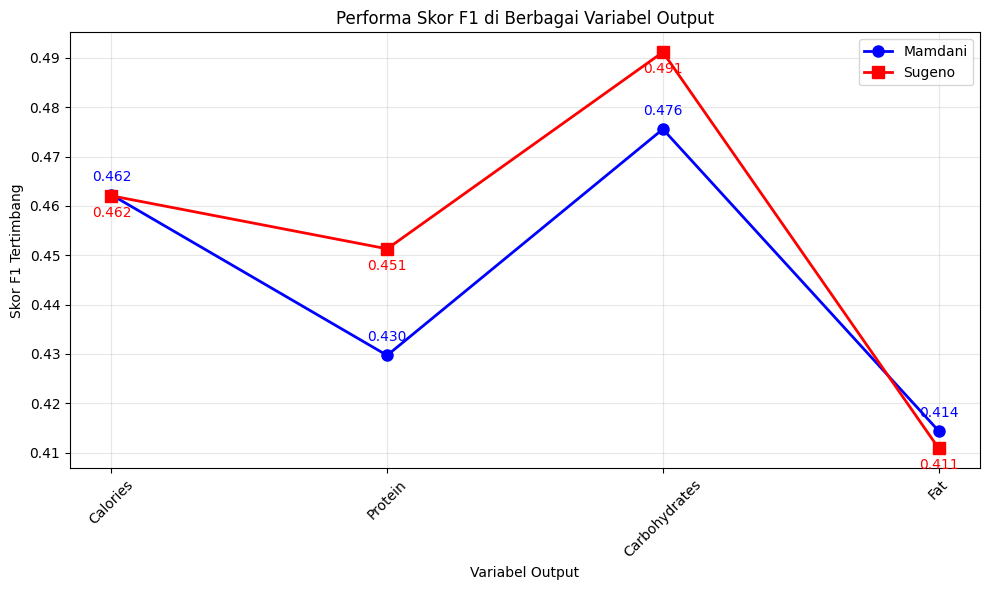

In [94]:
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk mengkategorikan nilai kalori dan makro aktual serta prediksi
def categorize_outputs(values, var_type):
    if var_type == 'Calories':
        if values <= 1800:
            return 'low'
        elif values <= 2400:
            return 'moderate'
        else:
            return 'high'
    elif var_type == 'Protein':
        if values <= 80:
            return 'low'
        elif values <= 120:
            return 'moderate'
        else:
            return 'high'
    elif var_type == 'Carbohydrates':
        if values <= 200:
            return 'low'
        elif values <= 300:
            return 'moderate'
        else:
            return 'high'
    elif var_type == 'Fat':
        if values <= 50:
            return 'low'
        elif values <= 75:
            return 'moderate'
        else:
            return 'high'
    return 'unknown'


# Terapkan logika fuzzy pada semua sampel dalam dataset
mamdani_preds_all = {var: [] for var in rule_output_3in4out.keys()}
sugeno_preds_all = {var: [] for var in rule_output_3in4out.keys()}
actual_categories_all = {var: [] for var in rule_output_3in4out.keys()}

# Gunakan seluruh dataset yang telah dibersihkan untuk evaluasi
evaluation_data = df_selected

for idx, row in evaluation_data.iterrows():
    bmi = row['Weight'] / ((row['Height']/100) ** 2)  # Hitung BMI dari Weight dan Height
    age = row['Ages']
    target = row['Daily Calorie Target']

    # Dapatkan output aturan
    rule_result = fuzzy_rules_3in4out(bmi, age, target)

    # Defuzzifikasi Mamdani dan kategorisasi
    mamdani_crisp = mamdani_defuzzification_4out(rule_result, z_samples_dict, mamdani_output_funcs)
    for var in mamdani_preds_all.keys():
        mamdani_preds_all[var].append(categorize_outputs(mamdani_crisp.get(var, 0), var)) # Gunakan .get dengan default 0

    sugeno_crisp = crisp_output_sugeno_4out(rule_result, constants_outputs)
    for var in sugeno_preds_all.keys():
        sugeno_preds_all[var].append(categorize_outputs(sugeno_crisp.get(var, 0), var)) # Gunakan .get dengan default 0

    actual_calories = row['Calories']
    actual_protein = row['Protein']
    actual_carbs = row['Carbohydrates']
    actual_fat = row['Fat']

    actual_categories_all['Calories'].append(categorize_outputs(actual_calories, 'Calories'))
    actual_categories_all['Protein'].append(categorize_outputs(actual_protein, 'Protein'))
    actual_categories_all['Carbohydrates'].append(categorize_outputs(actual_carbs, 'Carbohydrates'))
    actual_categories_all['Fat'].append(categorize_outputs(actual_fat, 'Fat'))


print(f"Perbandingan Akurasi Model (Skor F1 Tertimbang):\n")

mamdani_total_f1 = 0
sugeno_total_f1 = 0
output_vars = list(rule_output_3in4out.keys())

# Simpan skor F1 untuk plotting
mamdani_f1_scores = []
sugeno_f1_scores = []

for i, output_var in enumerate(output_vars):
    print(f"--- {output_var} ---")
    le = LabelEncoder()
    all_cats = list(set(actual_categories_all[output_var] + mamdani_preds_all[output_var] + sugeno_preds_all[output_var]))
    le.fit(all_cats)

    actual_encoded = le.transform(actual_categories_all[output_var])
    mamdani_encoded = le.transform(mamdani_preds_all[output_var])
    sugeno_encoded = le.transform(sugeno_preds_all[output_var])

    mamdani_f1 = f1_score(actual_encoded, mamdani_encoded, average='weighted', zero_division=0)
    sugeno_f1 = f1_score(actual_encoded, sugeno_encoded, average='weighted', zero_division=0)

    print(f" Skor F1 Mamdani: {mamdani_f1:.4f}")
    print(f" Skor F1 Sugeno: {sugeno_f1:.4f}")

    mamdani_f1_scores.append(mamdani_f1)
    sugeno_f1_scores.append(sugeno_f1)
    
    mamdani_total_f1 += mamdani_f1
    sugeno_total_f1 += sugeno_f1
    

print(f"\n--- Keseluruhan ---")
print(f" Rata-rata Skor F1 Tertimbang Mamdani: {mamdani_total_f1 / len(output_vars):.4f}")
print(f" Rata-rata Skor F1 Tertimbang Sugeno: {sugeno_total_f1 / len(output_vars):.4f}")

print(f"\nModel dengan performa terbaik secara keseluruhan: {'Mamdani' if mamdani_total_f1 > sugeno_total_f1 else 'Sugeno'}")

# Buat plot visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot batang membandingkan skor F1
x = np.arange(len(output_vars))
width = 0.35

bars1 = ax1.bar(x - width/2, mamdani_f1_scores, width, label='Mamdani', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x + width/2, sugeno_f1_scores, width, label='Sugeno', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Variabel Output')
ax1.set_ylabel('Skor F1 Tertimbang')
ax1.set_title('Perbandingan Skor F1: Mamdani vs Sugeno')
ax1.set_xticks(x)
ax1.set_xticklabels(output_vars, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Tambahkan label nilai pada batang
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset vertikal 3 poin
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset vertikal 3 poin
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Diagram lingkaran perbandingan keseluruhan
overall_scores = [mamdani_total_f1 / len(output_vars), sugeno_total_f1 / len(output_vars)]
labels = ['Mamdani', 'Sugeno']
colors = ['skyblue', 'lightcoral']
explode = (0.05, 0.05)

ax2.pie(overall_scores, labels=labels, colors=colors, autopct='%1.3f', 
        startangle=90, explode=explode, shadow=True)
ax2.set_title('Perbandingan Rata-rata Skor F1 Keseluruhan')

plt.tight_layout()
plt.show()

# Plot garis tambahan menunjukkan performa di berbagai variabel
plt.figure(figsize=(10, 6))
plt.plot(output_vars, mamdani_f1_scores, marker='o', linewidth=2, markersize=8, 
         label='Mamdani', color='blue')
plt.plot(output_vars, sugeno_f1_scores, marker='s', linewidth=2, markersize=8, 
         label='Sugeno', color='red')

plt.xlabel('Variabel Output')
plt.ylabel('Skor F1 Tertimbang')
plt.title('Performa Skor F1 di Berbagai Variabel Output')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Tambahkan anotasi nilai
for i, (mamdani_score, sugeno_score) in enumerate(zip(mamdani_f1_scores, sugeno_f1_scores)):
    plt.annotate(f'{mamdani_score:.3f}', (i, mamdani_score), 
                textcoords="offset points", xytext=(0,10), ha='center', color='blue')
    plt.annotate(f'{sugeno_score:.3f}', (i, sugeno_score), 
                textcoords="offset points", xytext=(0,-15), ha='center', color='red')

plt.tight_layout()
plt.show()